In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading a dataset
data = pd.read_csv('AdultIncome.csv')
data

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K
...,...,...,...,...,...,...,...,...
19782,53,Private,Masters,Married,White,Male,40,>50K
19783,22,Private,Some-college,Never-married,White,Male,40,<=50K
19784,40,Private,HS-grad,Married,White,Male,40,>50K
19785,58,Private,HS-grad,Widowed,White,Female,40,<=50K


In [3]:
data.describe()

,age,hours per week
count,19787.000000,19787.000000
mean,37.467378,40.938596
std,12.543376,10.991015
min,17.000000,1.000000
25%,27.000000,40.000000
50%,36.000000,40.000000
75%,46.000000,45.000000
max,90.000000,99.000000


In [4]:
data.isnull().sum(axis=0)

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

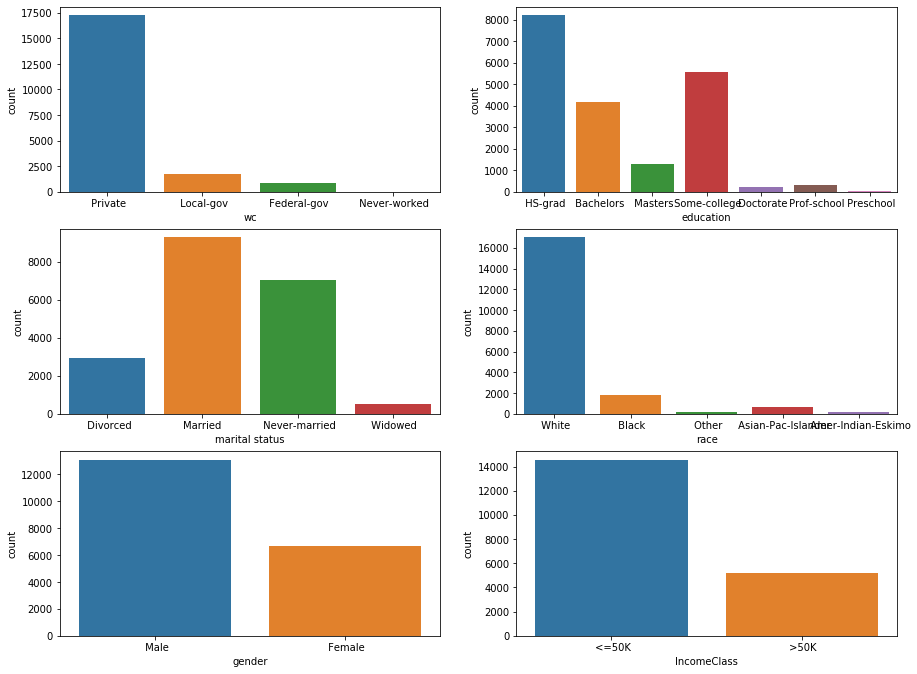

In [5]:
features = data[["wc","education","marital status","race","gender","IncomeClass"]].columns
plt.figure(figsize=(15,8*4))
gs = gridspec.GridSpec(8, 2)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.countplot(data = data, x = c)
plt.show()

In [6]:
# Create Dummy variables
data.dtypes
data_prep = pd.get_dummies(data, drop_first=True)

In [7]:
# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

# Spliting dataset into training and testing set
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

#decision tree classifier
dtc = DecisionTreeClassifier(random_state=1234)
dtc.fit(X_train, Y_train)

# Model testing
Y_predict = dtc.predict(X_test)

# Evaluation
cm1 = confusion_matrix(Y_test, Y_predict)
score1 = dtc.score(X_test, Y_test)

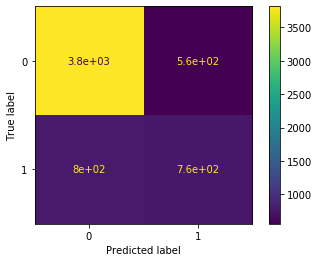

In [8]:
#plotting confusion matrix
plot_confusion_matrix(dtc, X_test, Y_test)  
plt.show()

In [9]:
#training Random Forest Classifier
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(X_train, Y_train)
# Testing of RFC model
Y_predict = rfc.predict(X_test)
# Evaluating the RFC model
cm2 = confusion_matrix(Y_test, Y_predict)
score2 = rfc.score(X_test, Y_test)

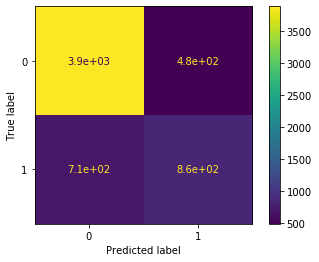

In [10]:
plot_confusion_matrix(rfc, X_test, Y_test)  
plt.show()